# Principles of data mining

## What is it?

[Merriam-Webster](https://www.merriam-webster.com/dictionary/data%20mining):

>**Data mining**
>
>*"the practice of searching through large amounts of computerized data to find useful patterns or trends"*
>
>**First known use: 1968**

(another word from the same year is "error bar", coincidence?)

### Terminology

- Variable
    * "table column"
    * Measured quantity (e.g. temperature)
- Sample
    * "table row"
    * A single measurement of one or more variables
- Model
    * A predictor for a variable given the other variables

### Show, don't tell
Looking at an example is the easiest way to get an idea what we're talking about, and the best example of data mining is doing the calculations and looking at the results.

This lecture note material is in a Jupyter notebook, which lets us not only write text, but also runs (here, [Python](https://python.org)) code and shows the results:

In [1]:
# Code here
print('Result here')

Result here


#### Doing it yourself
If you are familiar with Jupyter notebooks and want to run this notebook yourself, take a look at the [readme](./README.md) for instructions.

## Example: Looking at the data

We'll use a library called [Pandas](https://pandas.pydata.org) which has a lot of useful tooling for manipulating tabular data. (Similar to R)

In [5]:
import pandas as pd

First we'll have to read the data. This is a dataset from lake Windermere

In [108]:
data = pd.read_csv('Windermere_NBAS_data_1945_2013.txt', parse_dates=True, index_col=0, )
data.tail()

,variable,value,sign_if_LT_LOD
sdate,,,
2047-01-02,TEMP,5.60,NaN
2047-01-08,TEMP,5.10,NaN
2047-01-13,TEMP,4.95,NaN
2047-01-20,TEMP,5.10,NaN
2047-01-27,TEMP,4.60,NaN


The data has multiple variables that have been measured at certain dates. Let's see what's there:

In [36]:
pd.unique(data.variable)

array(['TEMP', 'OXYG', 'PO4P', 'ALKA', 'NO3N', 'SIO2', 'TOTP', 'NH4N',
       'TOCA', 'PH  ', 'SECC'], dtype=object)

Let's take a look at the variables:

In [109]:
data.groupby('variable').describe()

value                                                           \
           count          mean          std      min       25%        50%   
variable                                                                    
ALKA      1804.0  10132.061530  2007.322631  6100.00  8600.000  10000.000   
NH4N      1546.0      9.319599     8.372265     0.00     5.000      5.000   
NO3N      2736.0    323.472953   145.980099     8.00   220.000    300.000   
OXYG      3242.0     97.804226    10.454674    61.00    90.400     98.000   
PH         987.0      7.245064     0.422140     6.38     7.000      7.170   
PO4P      2511.0      2.170315     2.905830     0.10     0.600      1.000   
SECC       772.0      4.423316     1.092187     1.60     3.600      4.300   
SIO2      2771.0   1062.488271   656.177240   -44.00   440.000   1100.000   
TEMP      5472.0     10.825303     4.990691     0.60     6.215     10.300   
TOCA      1860.0      5.564737     4.477227     0.29     1.650      4.735   
TOTP      1577.0     13.410219     4.420519     3.30    11.000     13.000   

                              
               75%       max  
variable                      
ALKA      11500.00  17000.00  
NH4N         12.00    125.00  
NO3N        417.00   1196.00  
OXYG        105.00    134.30  
PH            7.37      9.66  
PO4P          3.00     66.30  
SECC          5.10      9.60  
SIO2       1680.00   2700.00  
TEMP         15.30     23.70  
TOCA          8.06     28.76  
TOTP         15.20     55.00

In [146]:
temps = data[data.variable == 'TEMP']
temps = temps.drop(columns='variable')
temps.tail()

,value,sign_if_LT_LOD
sdate,,
2013-10-15,12.3,NaN
2013-10-29,11.6,NaN
2013-11-12,9.5,NaN
2013-11-26,7.5,NaN
2013-12-10,7.1,NaN


In [160]:
monthly = temps.resample('1M').mean()
monthly.head()

,value
sdate,
1968-01-31,5.2000
1968-02-29,4.1875
1968-03-31,4.5375
1968-04-30,7.3200
1968-05-31,10.2000


/home/maaleske/miniconda3/envs/datamining/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  


<IPython.core.display.Javascript object>


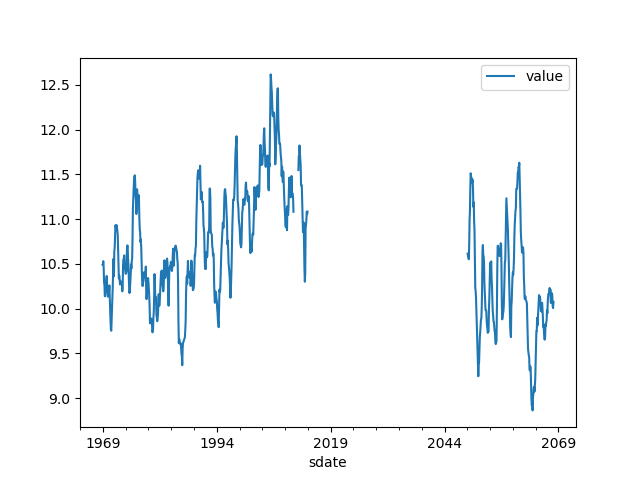

In [166]:
%matplotlib notebook
pd.rolling_mean(monthly, 12).plot()

Lesson 1: **Really** look at your data!

Peering at the statistics won't help you:
[The datasaur dozen](https://dabblingwithdata.wordpress.com/2017/05/03/the-datasaurus-a-monstrous-anscombe-for-the-21st-century/)

### Next: [Model validation](./02-validation.ipynb)